# Exploring the Python NBA_API package

## Game By Season Data

This notebook is to test out the nba_api package functionality and the data that can be gathered via the endpoints. The [example notebooks](https://github.com/swar/nba_api/tree/master/docs/examples) on the github for this package show that we can get anything from career stats of players, specific game data, play by play data,  and more. For game and play by play data, these endpoints can return lots of data so we'll need to be mindful of passing in parameters and asking specific questions rather than general ones.

The specific goals for this notebook:
1. Get data for the Golden State Warriors (the best team ever) during their dynasty run from 2015-2019
2. Look at game data and see how the yearly metrics trend year over year
  a. Which metrics are more predictive of winning versus losing games? Winning versus losing the Finals?
  b. 

In [1]:
# Ideally we will want to plot some items
# This import has to be done before others
import matplotlib # Do this first
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
# have plots render in notebook rather than in separate "Python" window
%matplotlib inline 

## Get All Golden State Warriors Games

In [2]:
from nba_api.stats.static import teams, players
nba_teams = teams.get_teams()
# Get Golden State Warriors team id
#nba_teams
warriors = [team for team in nba_teams if team['abbreviation'] == 'GSW'][0]
warriors_id = warriors['id']
display('Warriors team id: {0}'.format(warriors_id))

'Warriors team id: 1610612744'

In [3]:
# Get all games from the leaguegamefinder endpoint for the Warriors
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriors_id)
games = gamefinder.get_data_frames()[0]
display(games.head(5))
display(games.columns)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0
1,22019,1610612744,GSW,Golden State Warriors,0021900944,2020-03-07,GSW vs. PHI,W,240,118,...,0.750,7.0,28.0,35.0,30,4,2,7,19,4.0
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
3,22019,1610612744,GSW,Golden State Warriors,0021900913,2020-03-03,GSW @ DEN,W,239,116,...,0.636,5.0,30.0,35.0,31,8,3,11,23,16.0
4,22019,1610612744,GSW,Golden State Warriors,0021900901,2020-03-01,GSW vs. WAS,L,239,110,...,0.708,18.0,34.0,52.0,25,7,7,21,24,-14.0


Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

To get data from the 2015-2019 seasons, we can use multiple approaches. The examples listed in the github repo for this package pointed out that the SEASON_ID field seemed to have the current season as the last four digits (i.e. 2018 for the 2018-2019 season; not sure why all values start with 2).

We can do other things like realize the GAME_DATE field can be converted to a datetime type field and can be subsetted for games within our desired seasons (i.e. 2015 through 2019). Since seasons start at the end of a year and bleed into the next, I will have to make sure not to include games from unwanted seasons. I will give this method a try and see if it yields our desired seasons:

In [4]:
import pandas as pd
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])
dynasty_games = games.loc[(games['GAME_DATE'] > '2014-09-01') & (games['GAME_DATE'] < '2019-09-01'),:]
display(dynasty_games.head(5))

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
70,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10,3,11,21,3.2
71,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11,7,20,20,-8.0
72,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10,4,13,22,8.0
73,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
74,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9,3,13,15,-8.0


In [5]:
# Looks pretty good, let's output games per season to confirm this
dynasty_games['SEASON_ID'].value_counts()

22018    90
22017    88
22016    88
22015    88
22014    82
42015    24
42018    22
42014    21
42017    21
42016    17
12014     8
22019     8
12016     7
12015     7
12018     5
12017     4
Name: SEASON_ID, dtype: int64

Well, this shows that I was incorrect about the SEASON_ID field only having "2" in front of everything (this is why we still explore the data :) ). The example notebooks point out that the game data includes preseason & summer league games; I **think** this also includes postseason games. Based on my amazing knowledge of Warriors basketball and the games they've played over the years, my quick guess as to which numbers correspond to what types of games:
- 2 in the front would be regular season + preseason
- 4 in the front indicates post season
- 1 in the front indicates summar league

Let's do a quick inspection to see if the above is correct

In [6]:
regular_preseason = dynasty_games.loc[dynasty_games['SEASON_ID'].str.startswith('2'),:]
display(regular_preseason.head(5))

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
70,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10,3,11,21,3.2
71,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11,7,20,20,-8.0
72,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10,4,13,22,8.0
73,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
74,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9,3,13,15,-8.0


This is a bit hard to tell; the playoffs always wrap up by May, so let's see if there are any games in May or June
We'll do this by looking at the spread of games across months using the GAME_DATE field:

In [7]:
regular_preseason['GAME_DATE'].dt.month.value_counts().sort_index()

1     72
2     55
3     79
4     33
7     34
10    24
11    74
12    73
Name: GAME_DATE, dtype: int64

The above confirms that the regular season games are included above; however, preseason games tend to start in September while there are games included here in July.

I **think** this means that the '2' SEASON_ID games are actually regular season + summer league. An interesting way to combine the data...

Let's check out the '4' SEASON_ID games and see if they correspond to postseason games

In [8]:
postseason = dynasty_games.loc[dynasty_games['SEASON_ID'].str.startswith('4'),:]
display(postseason.head(5))

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
78,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9,6,16,23,-4.0
79,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5,7,15,22,1.0
80,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6,6,17,23,-13.0
81,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8,3,14,21,-14.0
82,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7,5,15,26,5.0


This looks pretty spot on, all of the opponents match who they've played in the playoffs and this can be confirmed here: https://basketball.realgm.com/nba/teams/Golden-State-Warriors/9/Playoff-History

Let's look at the monthly groupings to confirm:

In [9]:
postseason['GAME_DATE'].dt.month.value_counts()

5    52
4    27
6    26
Name: GAME_DATE, dtype: int64

Looks about right. Now onto the preseason games (which I initially thought were summer league games):

In [10]:
actually_preseason = dynasty_games.loc[dynasty_games['SEASON_ID'].str.startswith('1'),:]
actually_preseason

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
182,12018,1610612744,GSW,Golden State Warriors,0011800079,2018-10-12,GSW vs. LAL,L,241,105,...,0.735,11.0,29.0,40.0,25,8,4,16,30,-14.0
183,12018,1610612744,GSW,Golden State Warriors,0011800065,2018-10-10,GSW @ LAL,L,241,113,...,0.556,15.0,41.0,56.0,23,11,3,25,38,-10.0
184,12018,1610612744,GSW,Golden State Warriors,0011800054,2018-10-08,GSW vs. PHX,L,239,109,...,0.826,9.0,24.0,33.0,26,5,6,18,26,-8.0
185,12018,1610612744,GSW,Golden State Warriors,0011800039,2018-10-05,GSW vs. SAC,W,241,122,...,0.739,9.0,44.0,53.0,29,8,6,12,18,28.0
186,12018,1610612744,GSW,Golden State Warriors,0011800005,2018-09-29,GSW vs. MIN,L,241,110,...,0.769,7.0,41.0,48.0,33,9,8,17,23,-4.0
298,12017,1610612744,GSW,Golden State Warriors,0011700077,2017-10-13,GSW vs. SAC,W,241,117,...,0.588,21.0,26.0,47.0,34,4,4,12,15,11.0
299,12017,1610612744,GSW,Golden State Warriors,0011700044,2017-10-08,GSW @ MIN,W,240,142,...,0.800,7.0,26.0,33.0,32,16,10,22,31,32.0
300,12017,1610612744,GSW,Golden State Warriors,0011700024,2017-10-05,GSW vs. MIN,L,240,95,...,0.520,8.0,36.0,44.0,27,3,8,19,21,-7.6
301,12017,1610612744,GSW,Golden State Warriors,0011700001,2017-09-30,GSW vs. DEN,L,240,102,...,0.833,17.0,36.0,53.0,17,13,4,14,28,-6.0
407,12016,1610612744,GSW,Golden State Warriors,0011600102,2016-10-21,GSW vs. POR,W,240,107,...,0.923,9.0,42.0,51.0,27,5,8,14,18,11.0


In [11]:
actually_preseason['GAME_DATE'].dt.month.value_counts()

10    29
9      2
Name: GAME_DATE, dtype: int64

### Year by Year Metrics: Regular Season

Let's see how the year by year statistics for the dynasty years compare, starting with the regular season.

Certain things like points and 3 pointers made are fun to see (and I'll see how they look), but other metrics like Plus Minus and Turnovers are typically more indicative of whether a team ends up winning or not. Let's give it a look and see how the metrics influence the W-L outcomes:

In [12]:
# First filter out the summer league games
regular = regular_preseason.loc[regular_preseason['GAME_DATE'].dt.month != 7,:]
regular.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

### First some fun stuff

#### FGM + FG %

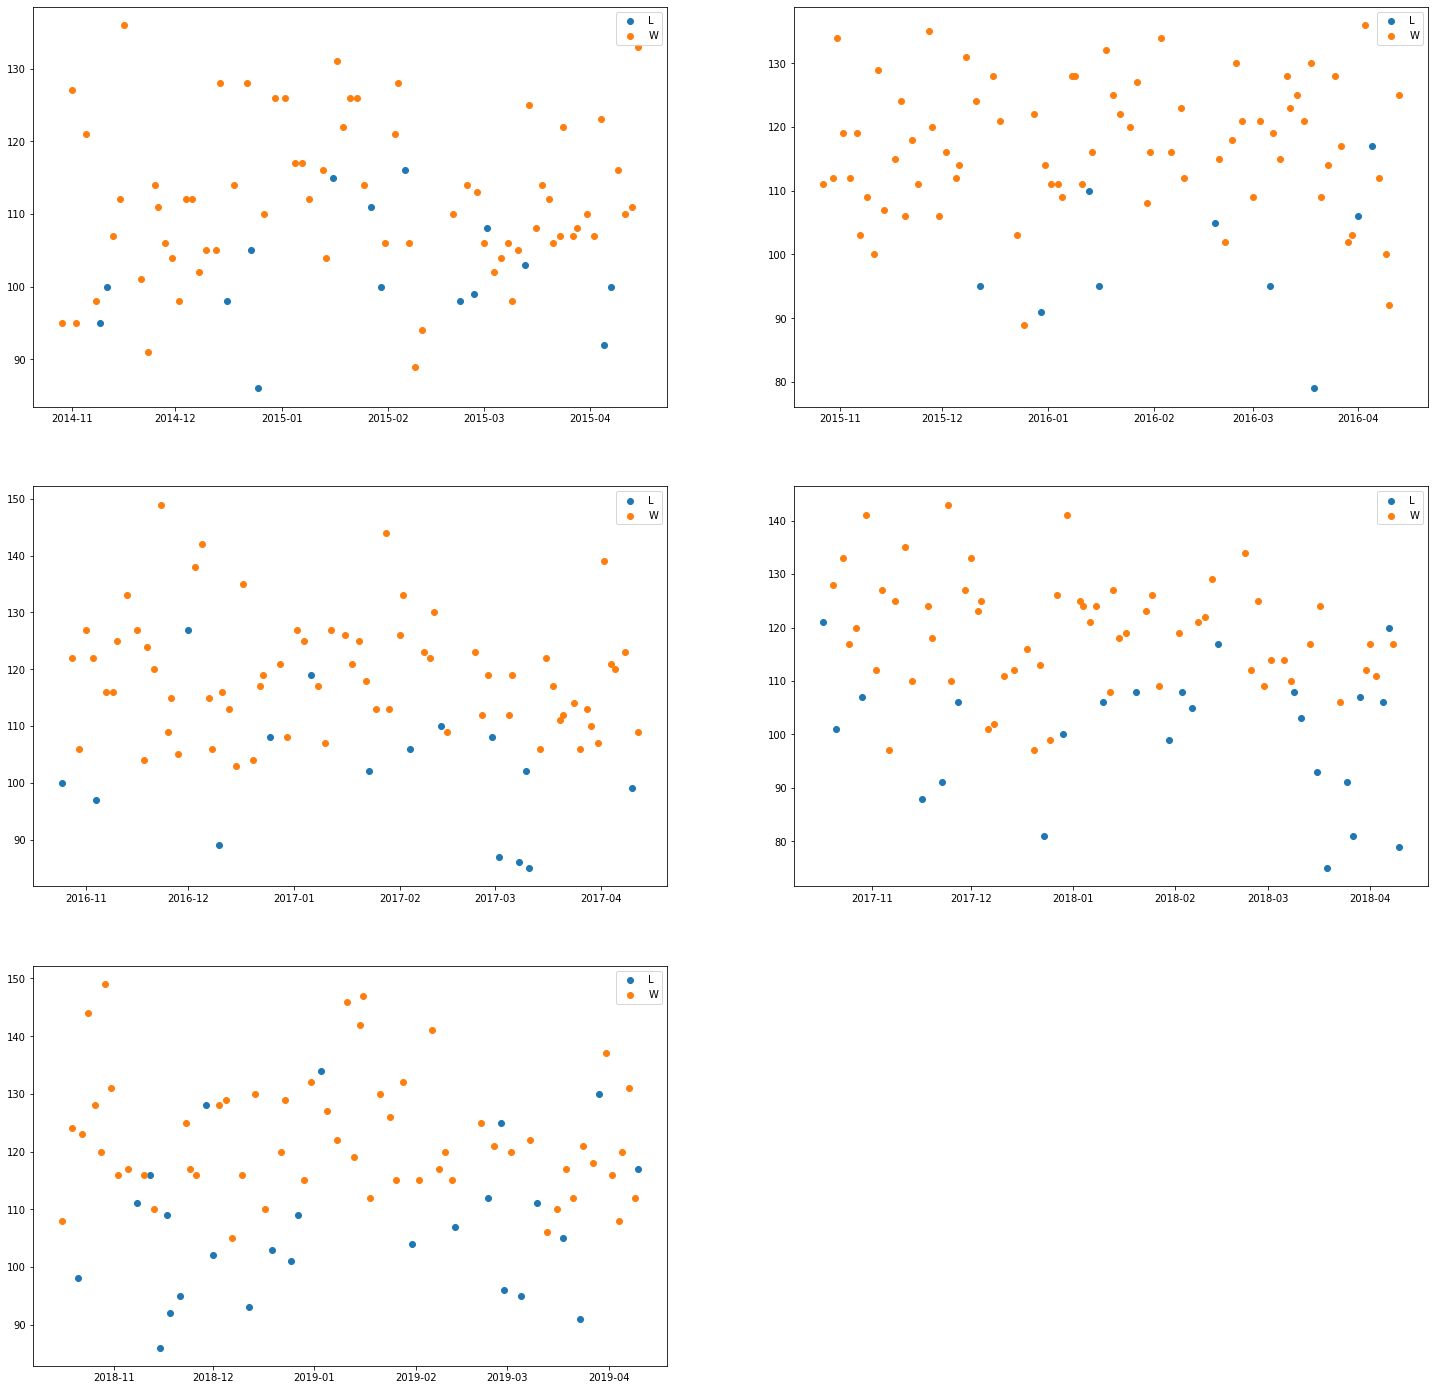

In [13]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'PTS'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

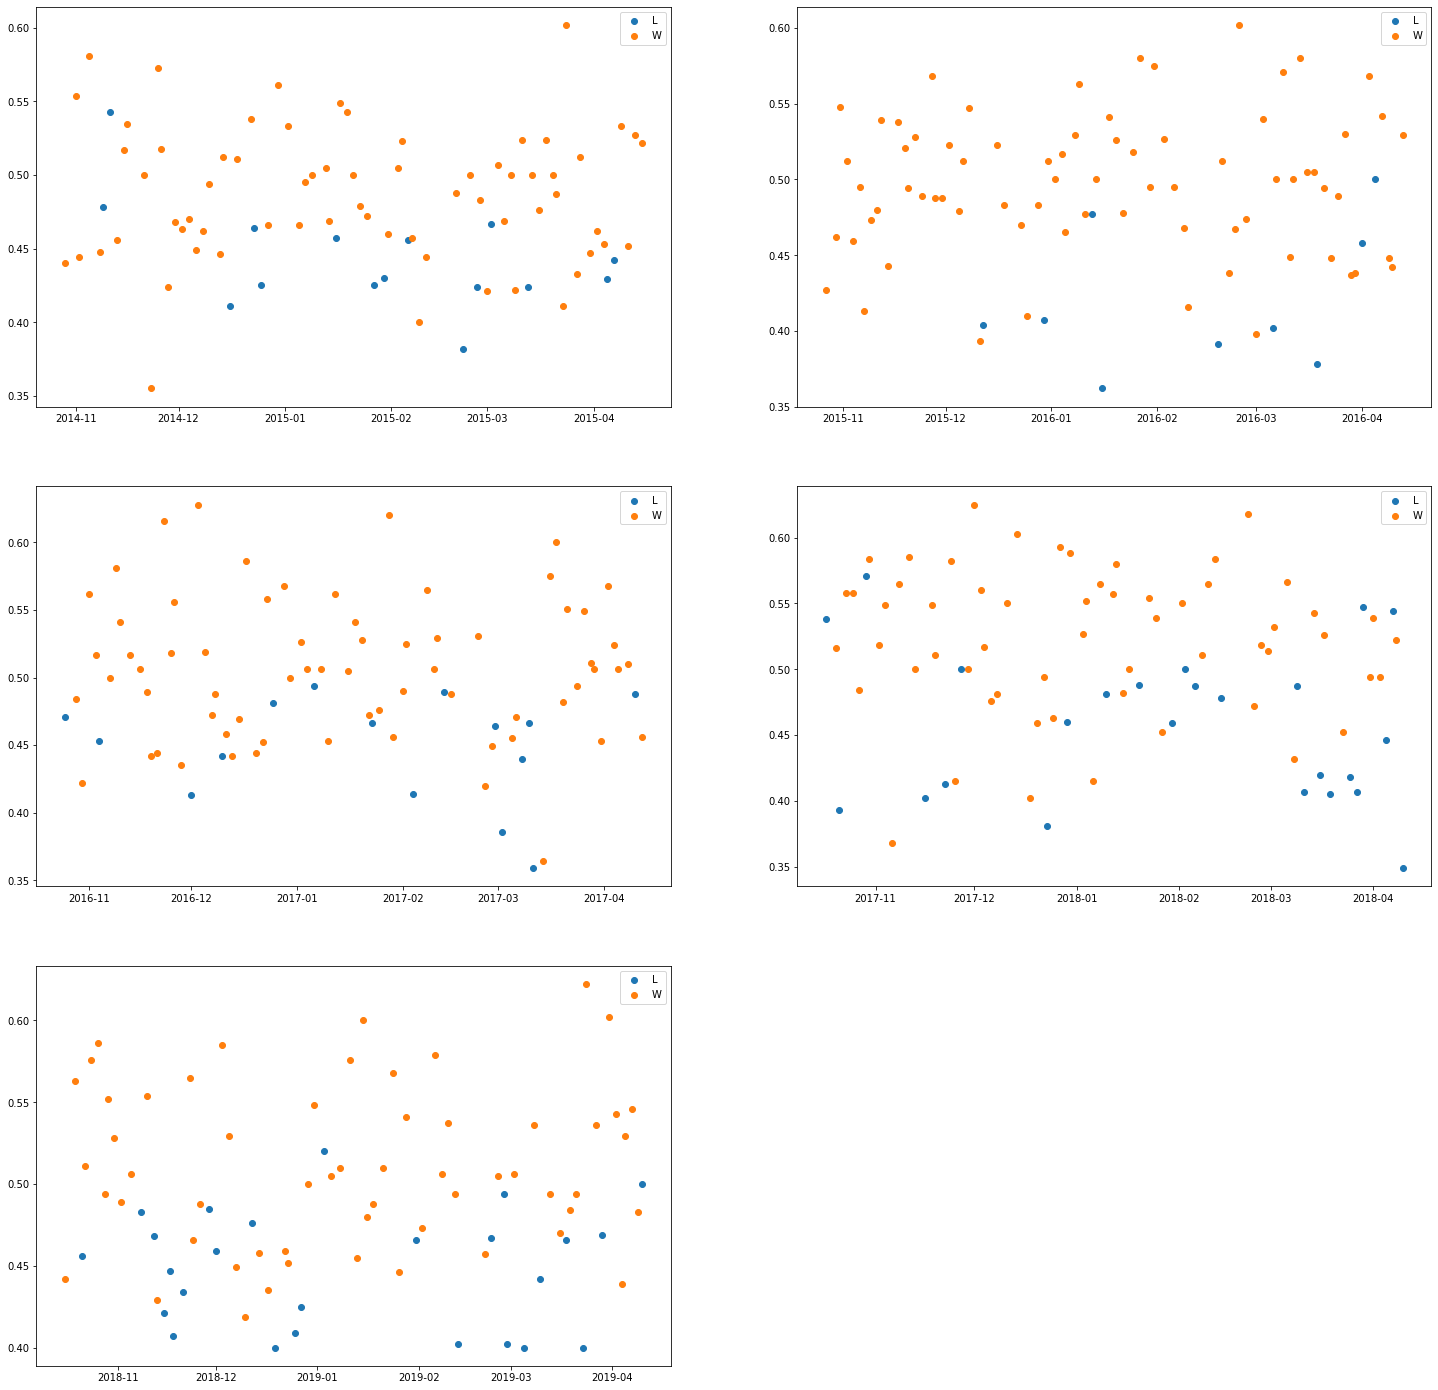

In [14]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'FG_PCT'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

For the **most** part, it would appear that more points + better field goal percentage would lead to more wins; there are naturally some exceptions where a higher number of points still leads to a loss (which correspond to the shootout games we all love and adore). 

We can see that the spread for field goal percentage is rather consistent through the years, validating the Dub's offensive efficiency + firepower. What **is** interesting is that the spread for point totals for 2014-2015 and 2015-2016 are not as high as the other seasons, and the distinction between the wins and losses are more clear (we see very few high scoring + FG % losses). This of course suggests less pure offensive firepower, but also suggests more consistent and reliable defense being played, which can be validated by looking at W-L splits for defensive rating (down below). The team at this point wasn't as star heavy but had reliable depth and lots of contributors like Andre Iguodala, Shaun Livingston, Leandro Barbosa, Andrew Bogut and more.

Once Kevin Durant joins the team for the 2016-2017 season onward, we see the spread for point totals increase (we start to get some 150 point games, oh my!) but we also start to see the distiction between the wins and losses become less clear (we start to see some very high scoring losses, especially in the last two seasons). This would jive with blown leads, less reliable defense, and perhaps just professional teams figuring out how to beat the best (which they did do in the 3 years Kevin Durant was with the team). 

Kevin Durant coming to the team also required some salary cap manuvers which included dumping some of the core bench players mentioned above and filling in the spots with cheaper contracts. A necessity when it comes to having multiple stars on one team, but one that can make the team top heavy and wear down at times (which was a theme in the Kevin Durant years of coasting through the regular season to "flip the switch" for the playoffs).

### 3PTM + 3PTA + 3PT%

Let's see if the same trends hold true for the 3 point metrics:

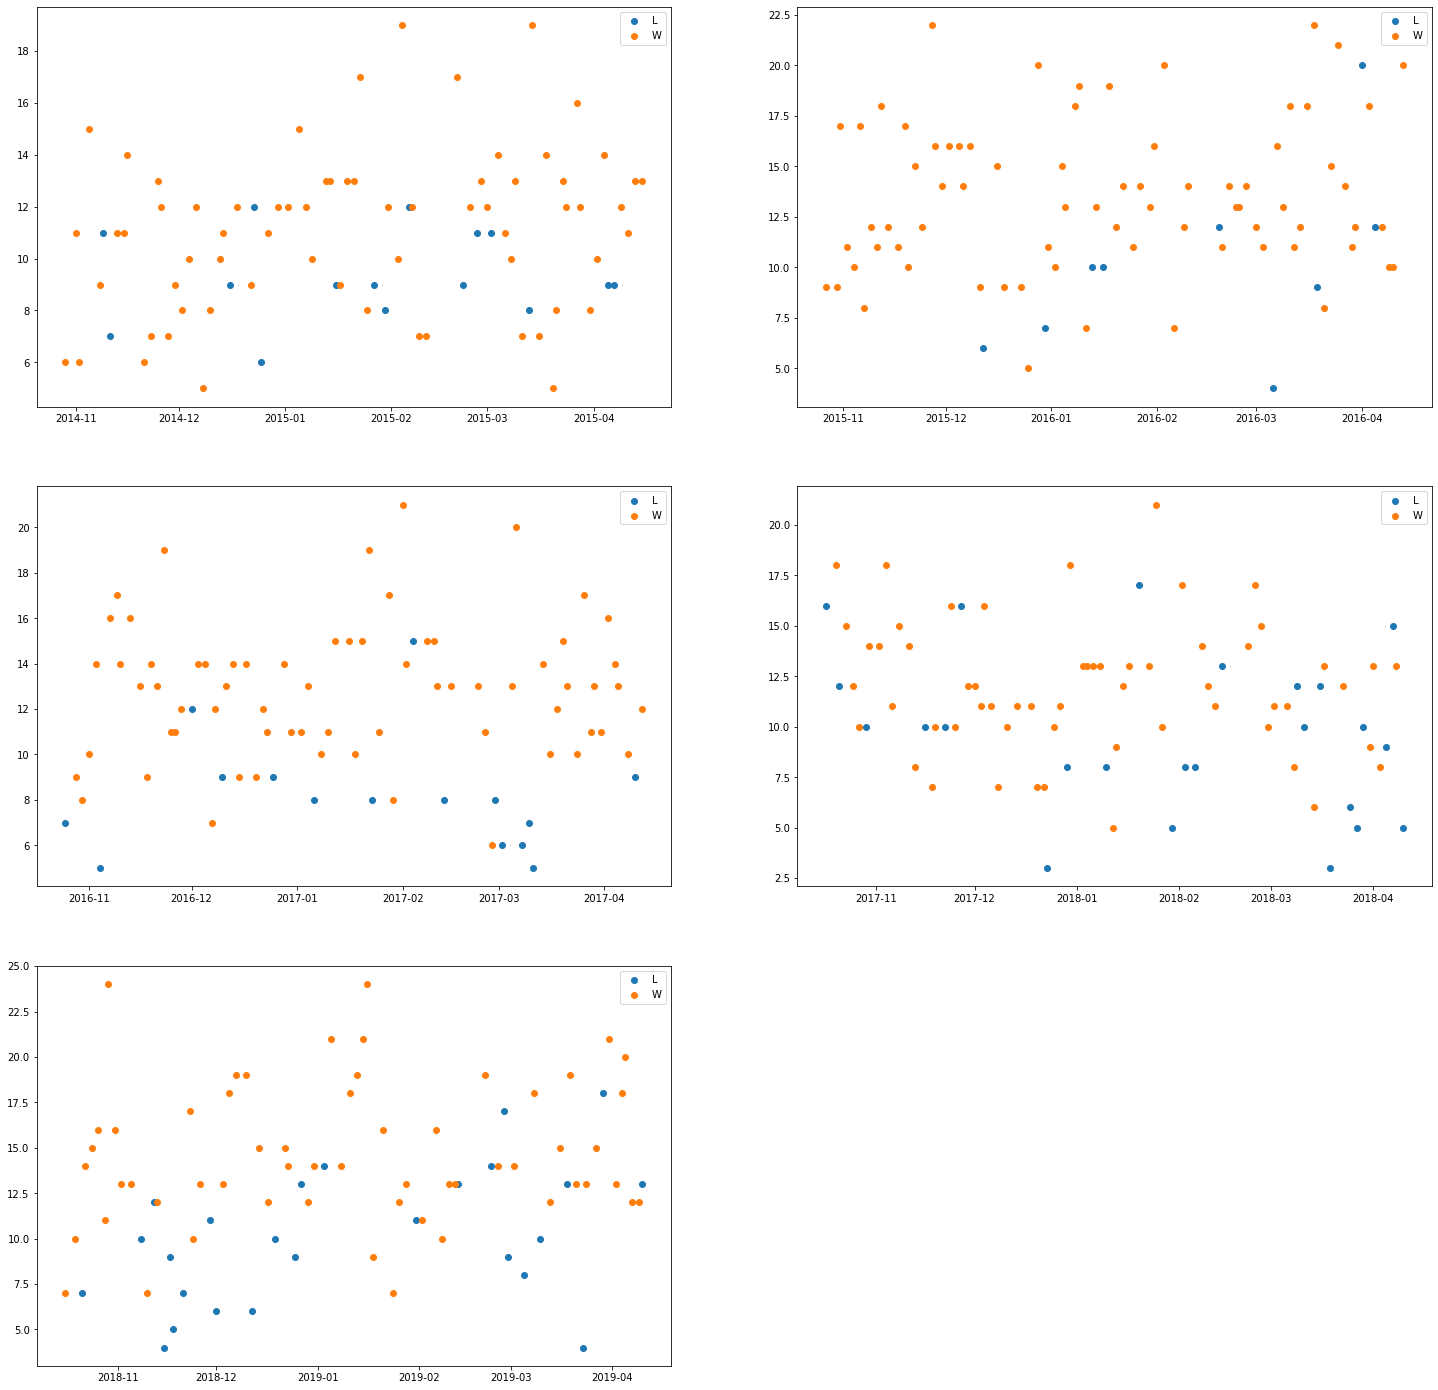

In [15]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'FG3M'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

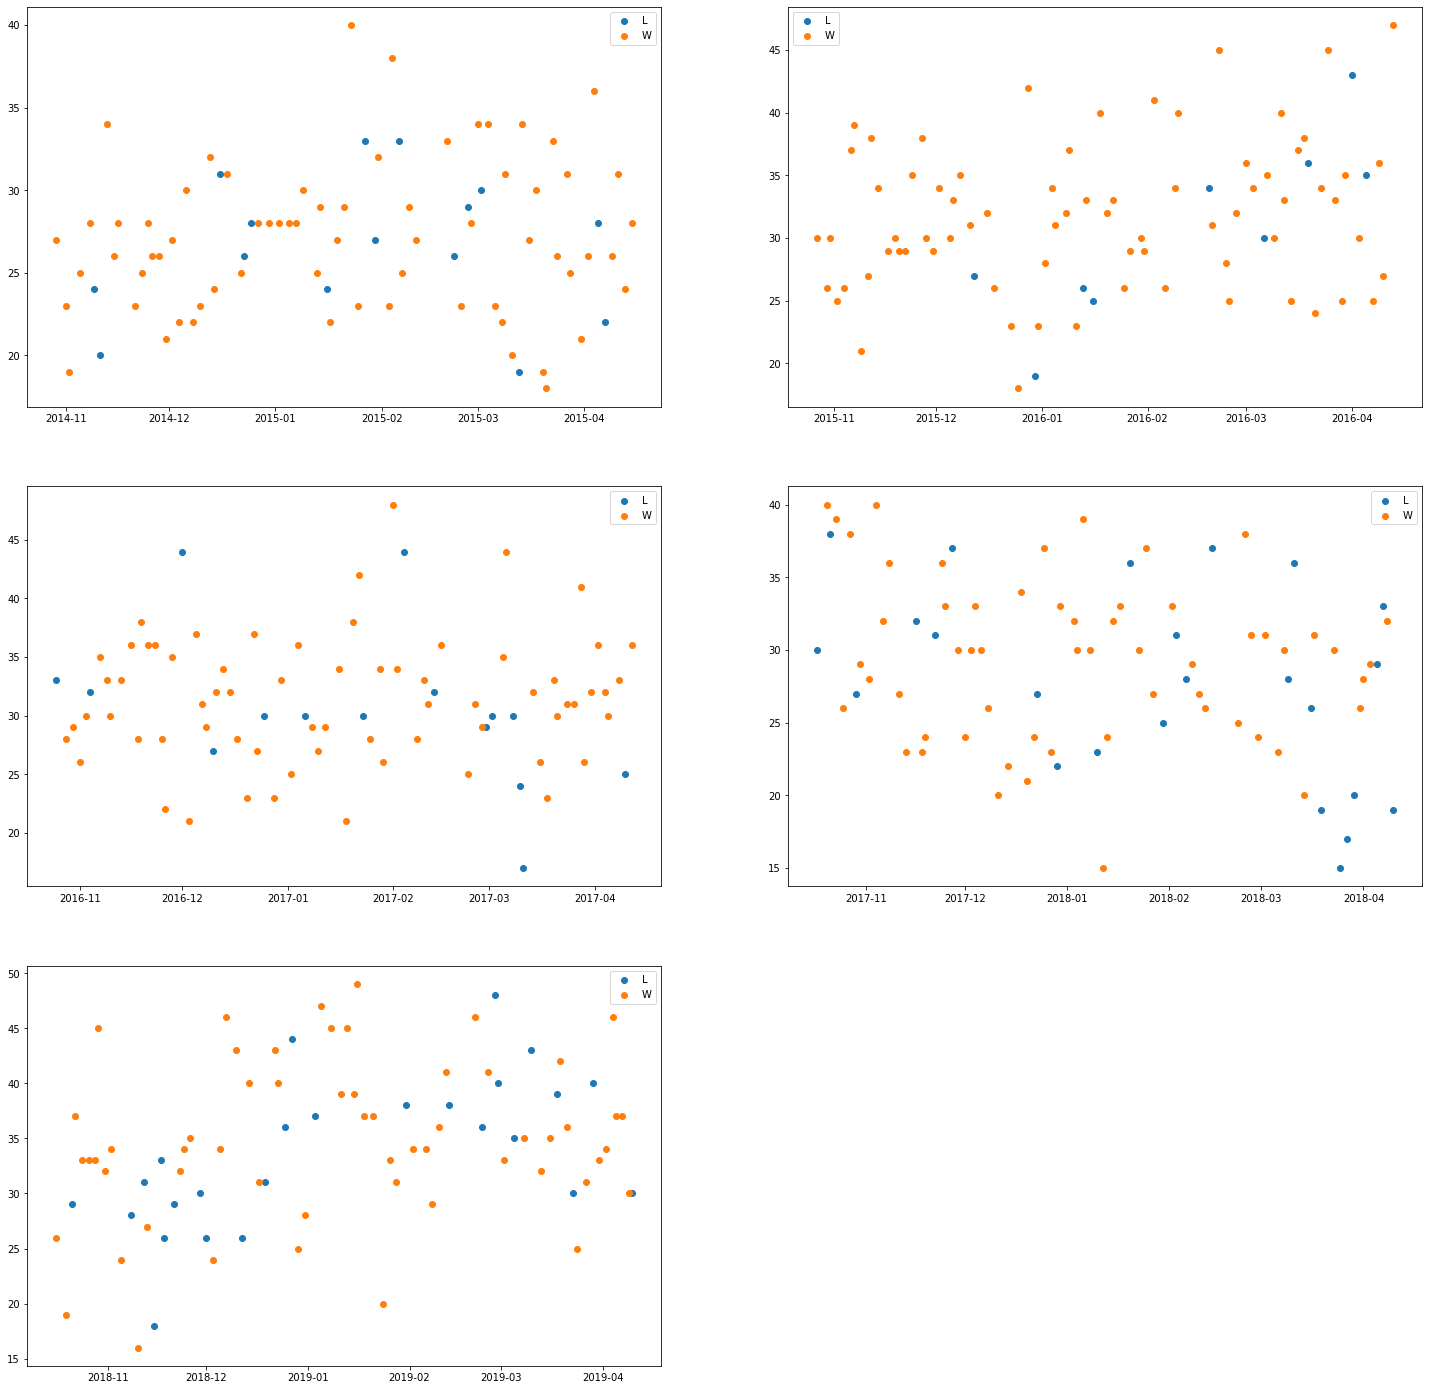

In [16]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'FG3A'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

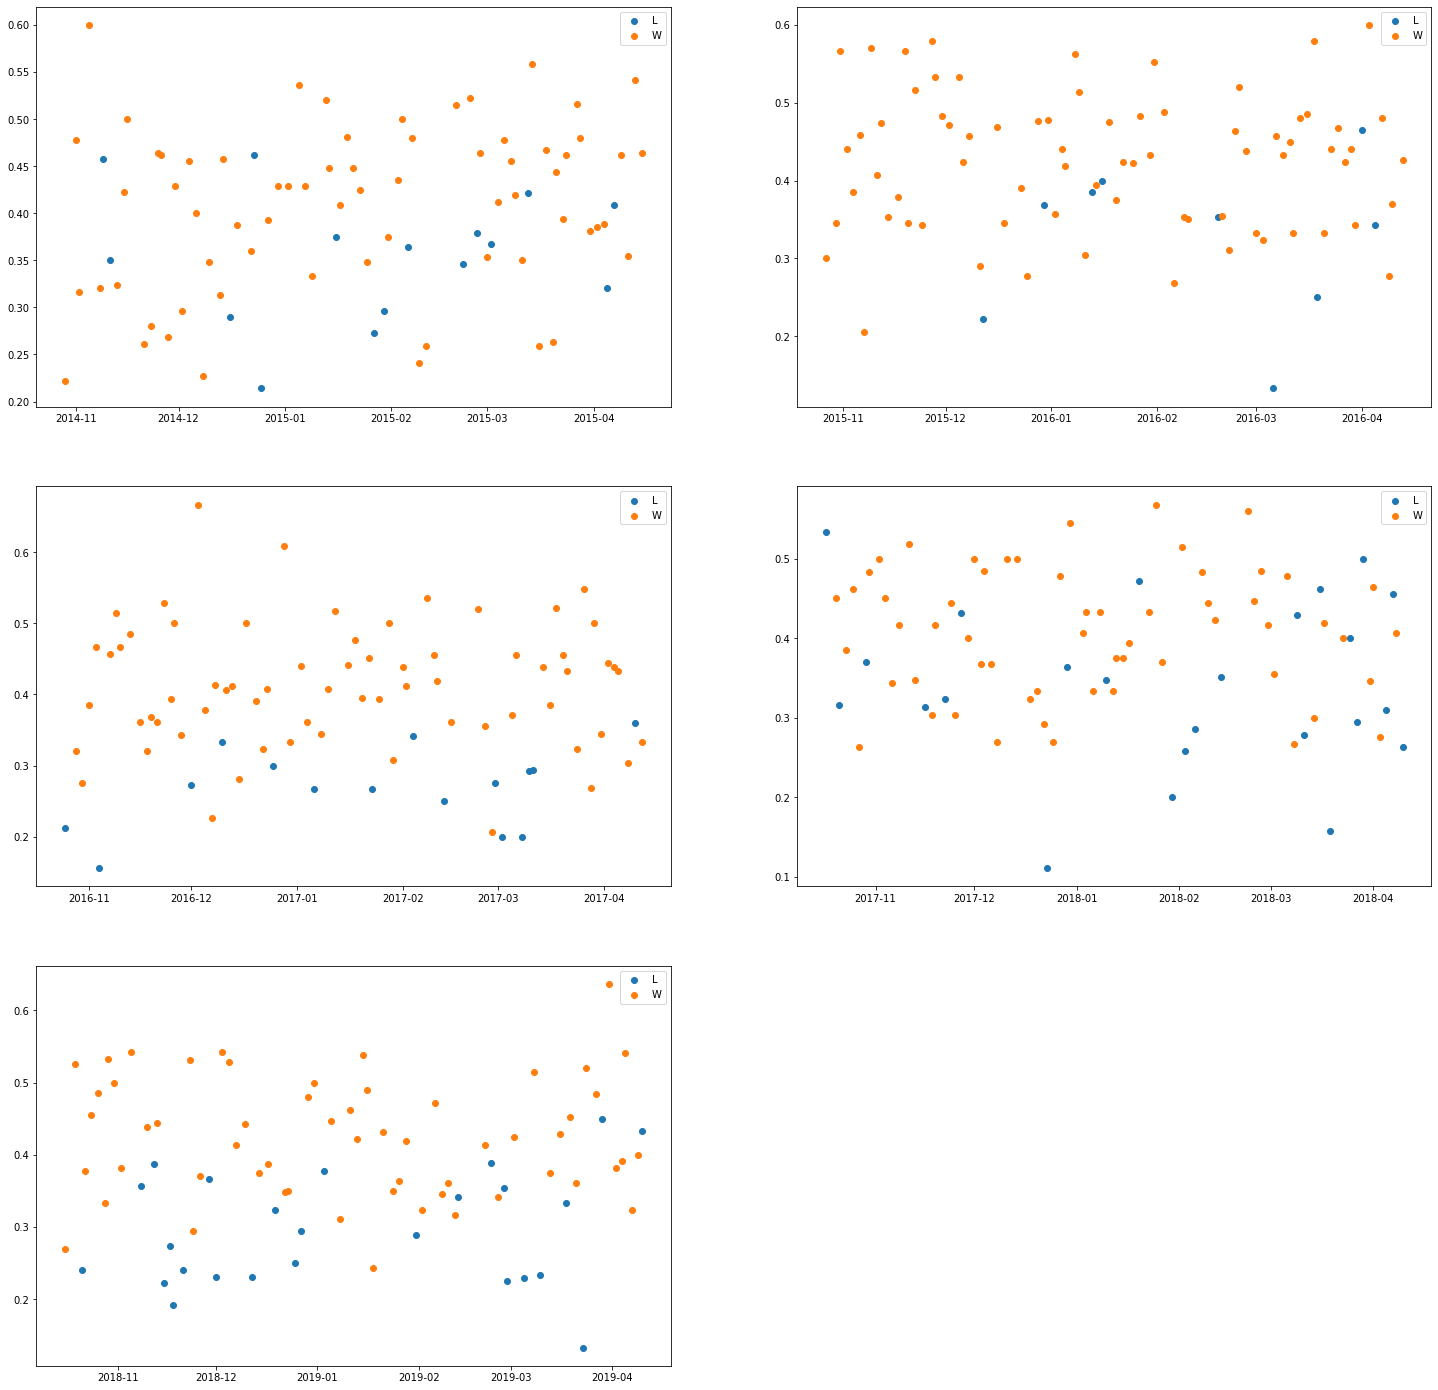

In [17]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'FG3_PCT'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

There are similar trends here compared to overall points + FG %, but there are a couple noticable differences:
  - Looking at the W-L splits for 3 pointers attempted muddies the picture a bit; there isn't a clean boundary for any of the Warriors seasons
    - This is probably because it gives an incomplete view: even teams that are excellent at 3 pointers (like the Warriors) will have off games in that department, and if the team can't play defense or hit twos then more 3 point attempts won't necessarily equal success (gotta MAKE the buckets, after all. Talking to you Houston...)
  - For 3 pointers made and percentage, 2016-2017 bucks the trends we saw for points and FG percentage: a year Kevin Durant was on the team but the W-L divide is alot more clear than the other KD seasons. This must have been before complacency set in...
  - 2017-2018 seems like our worst year making 3 pointers, and not even necessarily on more volume (in fact I think we attempted more in 2018-2019)
  - The spread of 3 pointers made and 3 point % was tighter in the pre KD years; the KD seasons saw some of the Warrior's worst 3 point shooting nights (handful of games below 20% and 5 3-pointers made compared to 1 or none previously) but not necessarily their best (only 2018-2019 has some games with almost 25 3-pointers made)
  
Let's see if I can validate some of my observations above with some aggregations:

In [18]:
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    desc = season_df[['PTS','FG_PCT','FG3M','FG3A','FG3_PCT']].describe()
    print('\n',season,'\n',desc)


 22014 
               PTS     FG_PCT       FG3M       FG3A    FG3_PCT
count   82.000000  82.000000  82.000000  82.000000  82.000000
mean   109.951220   0.479232  10.768293  27.036585   0.397878
std     10.876299   0.046923   3.015592   4.517306   0.086903
min     86.000000   0.355000   5.000000  18.000000   0.214000
25%    103.250000   0.447250   9.000000  24.000000   0.346500
50%    109.000000   0.471000  11.000000  27.000000   0.409000
75%    116.000000   0.511750  12.750000  30.000000   0.462000
max    136.000000   0.602000  19.000000  40.000000   0.600000

 22015 
               PTS     FG_PCT       FG3M       FG3A    FG3_PCT
count   82.000000  82.000000  82.000000  82.000000  82.000000
mean   114.890244   0.488476  13.134146  31.609756   0.414232
std     11.627985   0.052099   4.008516   5.989200   0.094018
min     79.000000   0.362000   4.000000  18.000000   0.133000
25%    109.000000   0.458250  10.250000  27.000000   0.347000
50%    115.500000   0.494000  12.500000  31.000000

Quickly we can see the offensive trends:
- The Warrior's average point totals pretty much increase year over year (except in 2017-2018) 
- Average field goal percentage also pretty much increases year over year (except for 2018-2019).
- Average 3 point field goal percentage jumps to a high during their 73-9 season, then falls back to about 38.5% for every single KD season
- 2017-2018 really does seem like our worst 3 point shooting year, with a HUGE dip in 3 point attempts at the same success rate (also this year is the only year that the average 3 point % was significantly below the median, suggesting that it could have been some truly terrible shooting nights dragging down the average)
  - It does seem to coincide with more success in the 2 point range, with highs in FG% for each quartile
- Most of the average values match the medians and the interquartile ranges (75% value - 25% value) aren't too far off from the standard deviations, so if some of the outlier performances were removed this data would be pretty nicely distributed.

## The Less Glamorous End: Defense

There's a common saying about sports that "offense sells the tickets, defense wins championships". Not many sports fans will buy tickets to see a great defense, but at the end of the day teams cannot be the last one standing without enough defense to win. 

There aren't a ton of defensive metrics in the game data but let's check out their impact made for Warriors during their run.

#### Steals

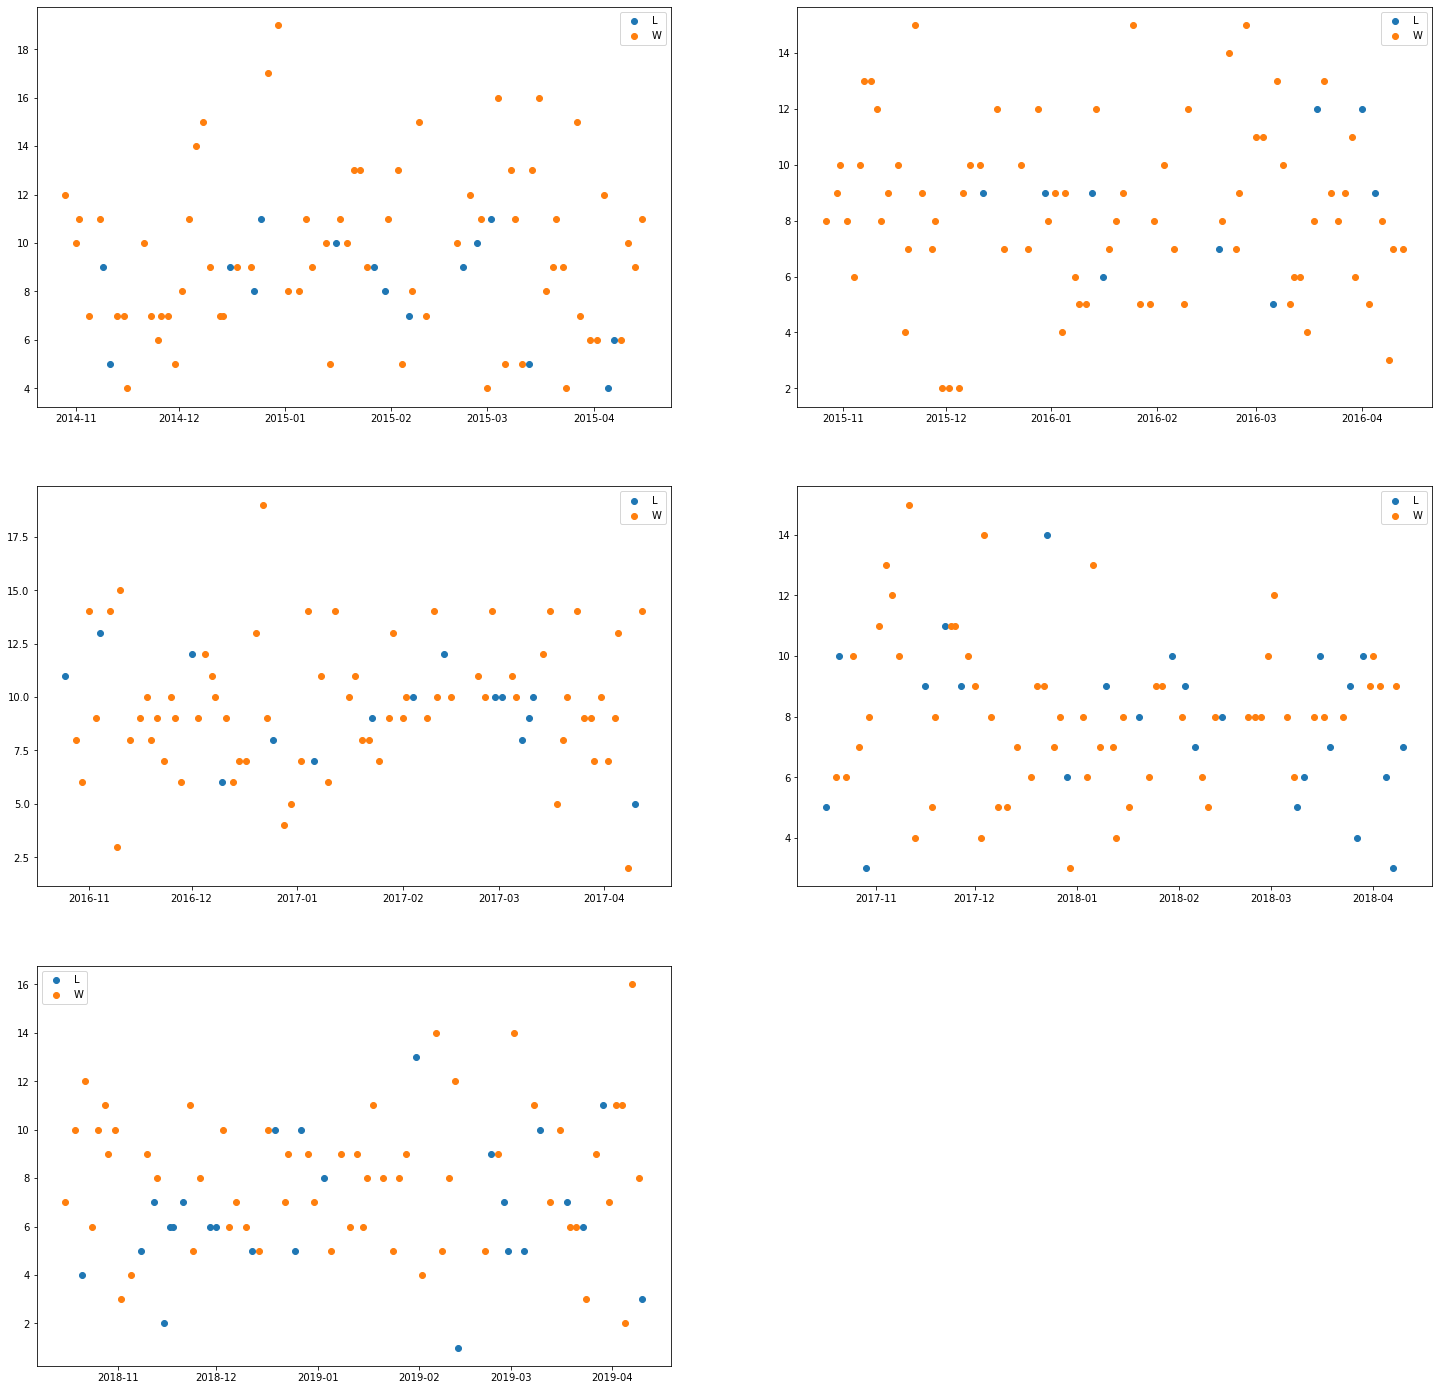

In [19]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'STL'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

#### Blocks

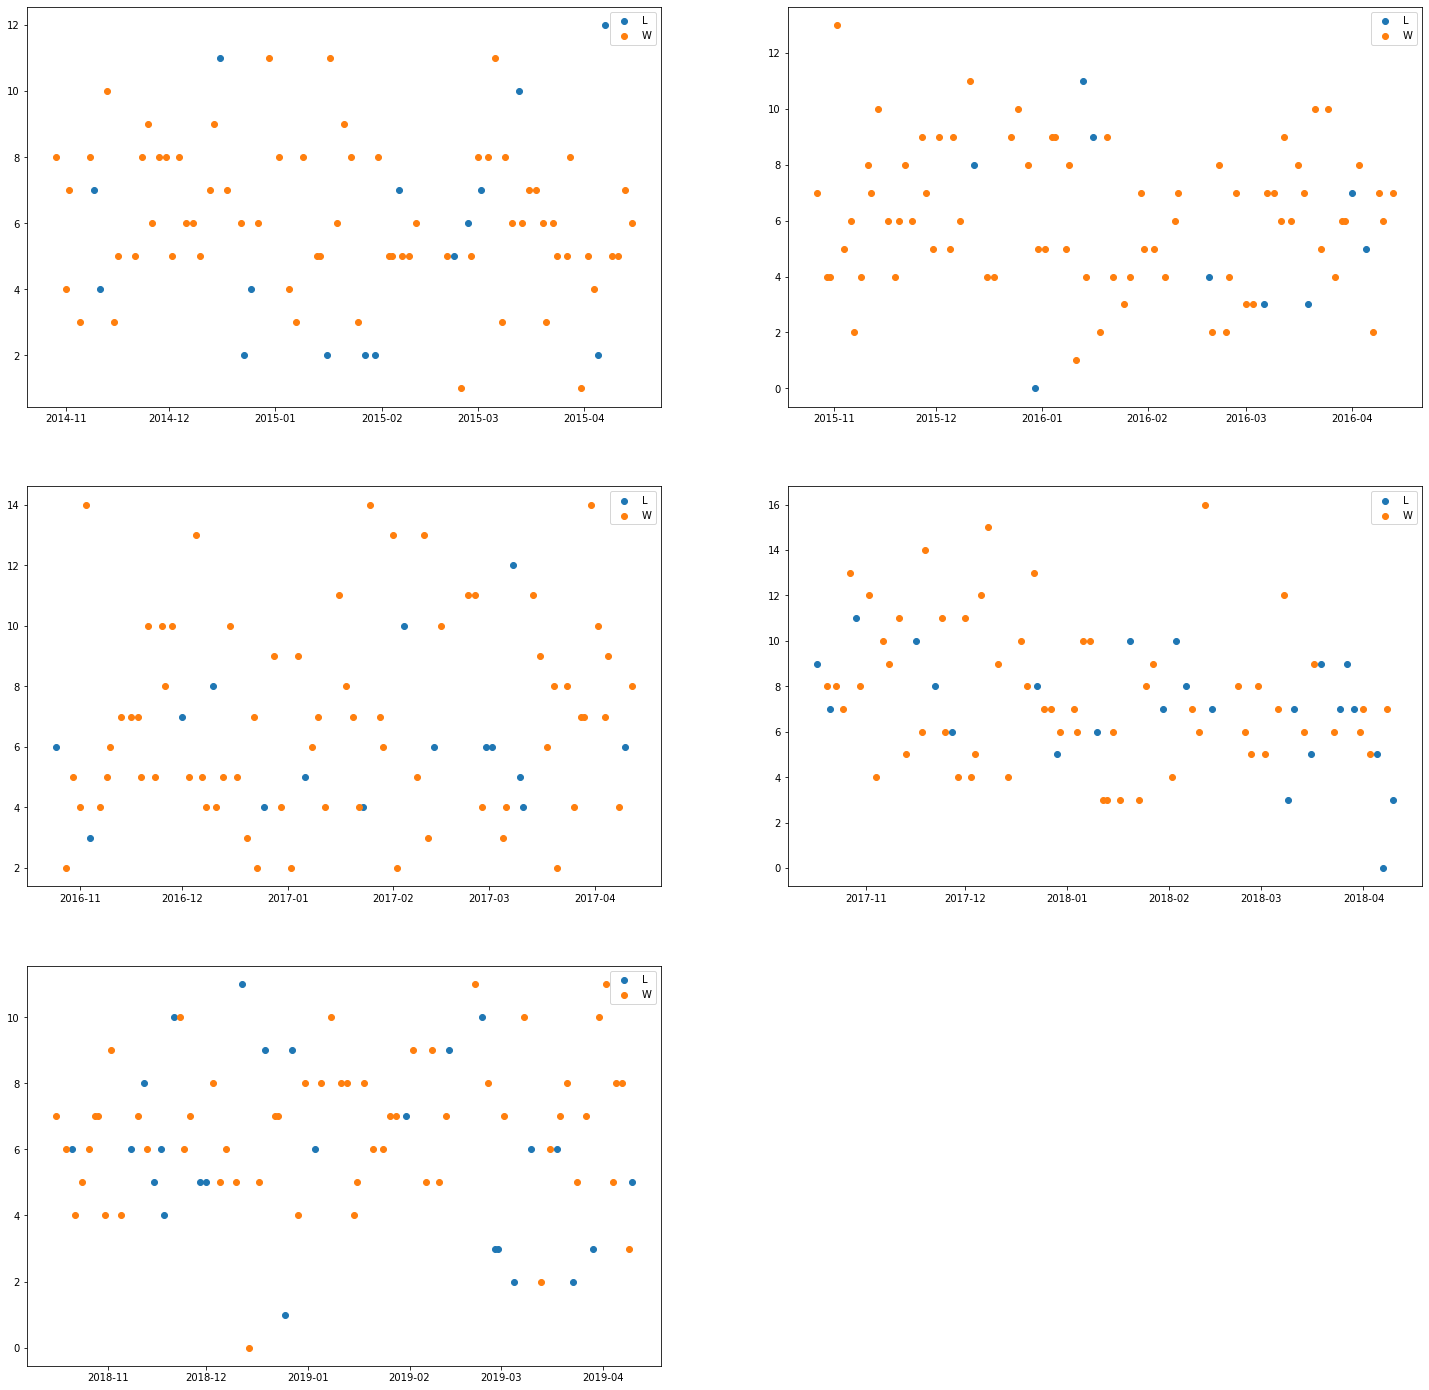

In [20]:
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'BLK'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

#### Turnovers

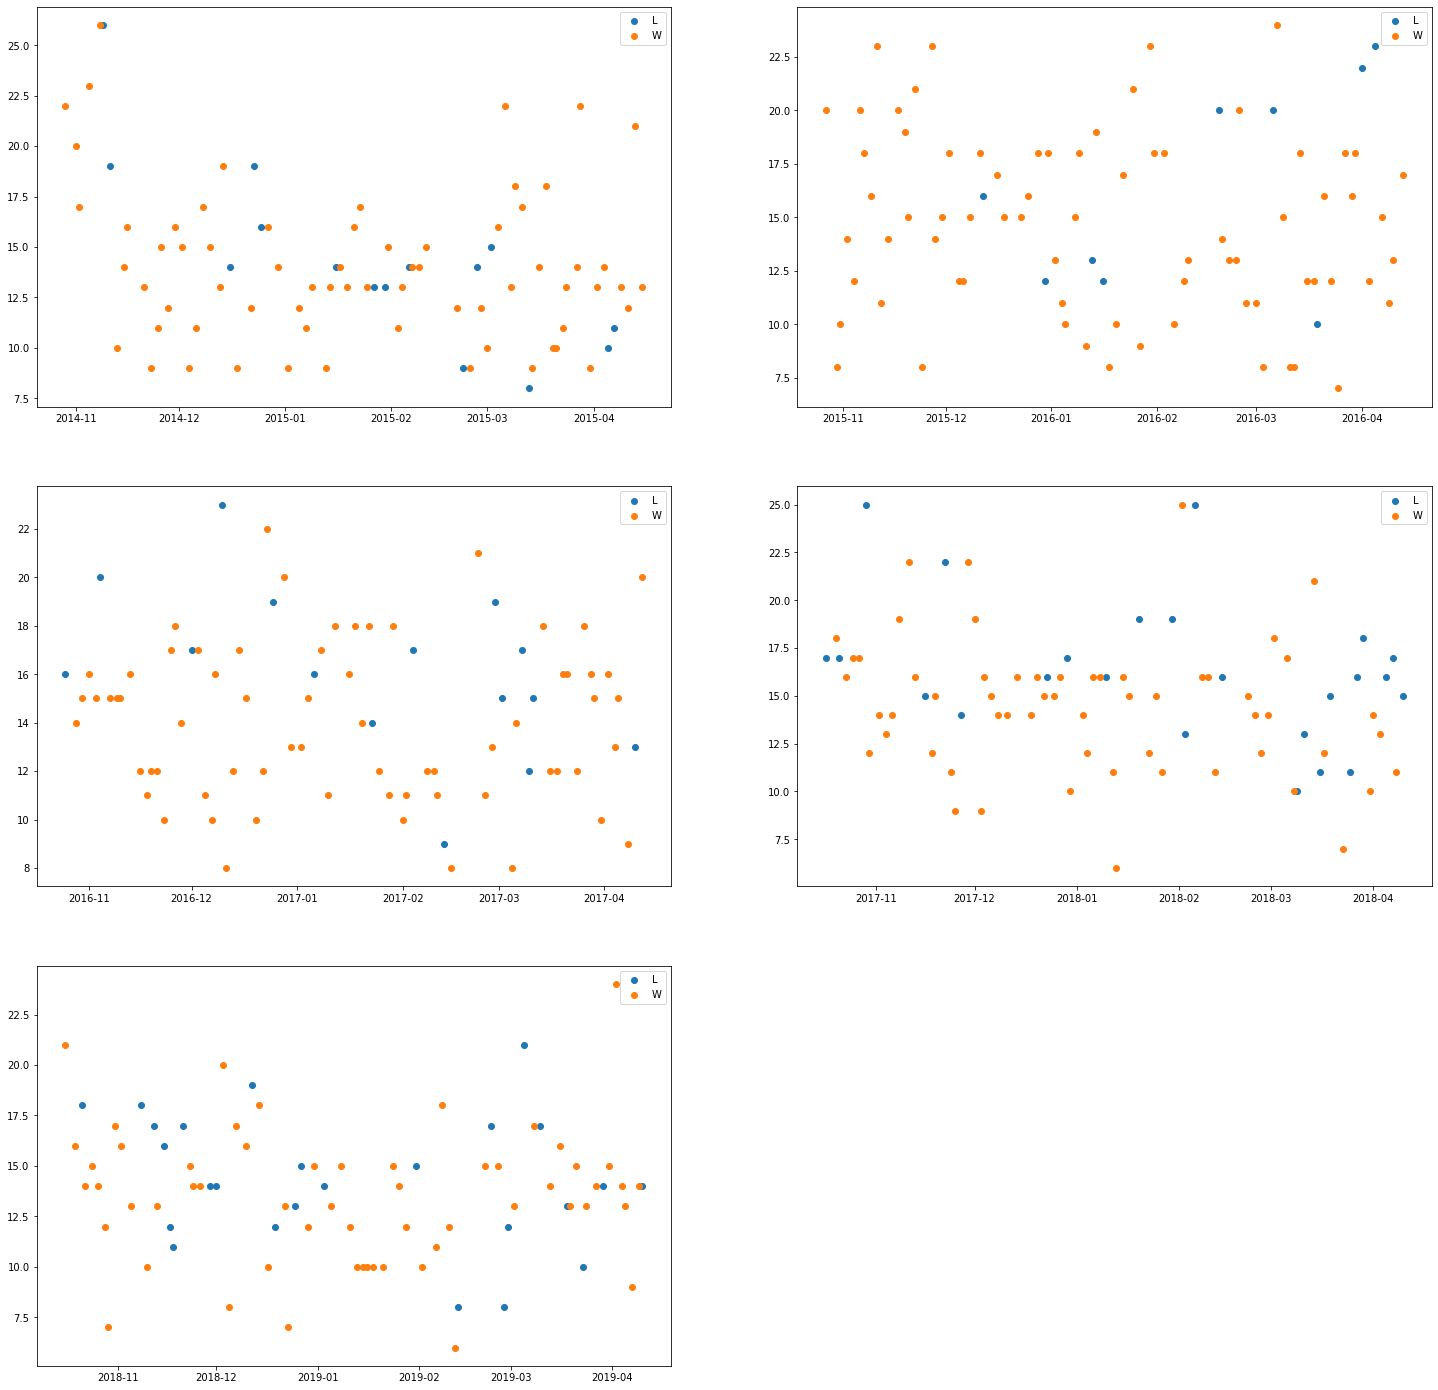

In [21]:
'''
Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')
'''
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'TOV'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

We don't seem to see a whole lot of impact when it comes to steals/blocks/turnovers and corresponding wins and losses.

#### Plus Minus

Plus Minus is a simple measure of points scored minus points given up. Looking at this data at a player level would be more helpful to really see some impact; at a team level, one would expect that all wins would have a positive plus minus (more points scored than given up) and all loses would have a negative plus minus. 

What we **can** look for is how many close loses and close wins there were by season. When teams have great seasons they will typically more often than not have favorable records in close games, even dominant records. Let's see how they did

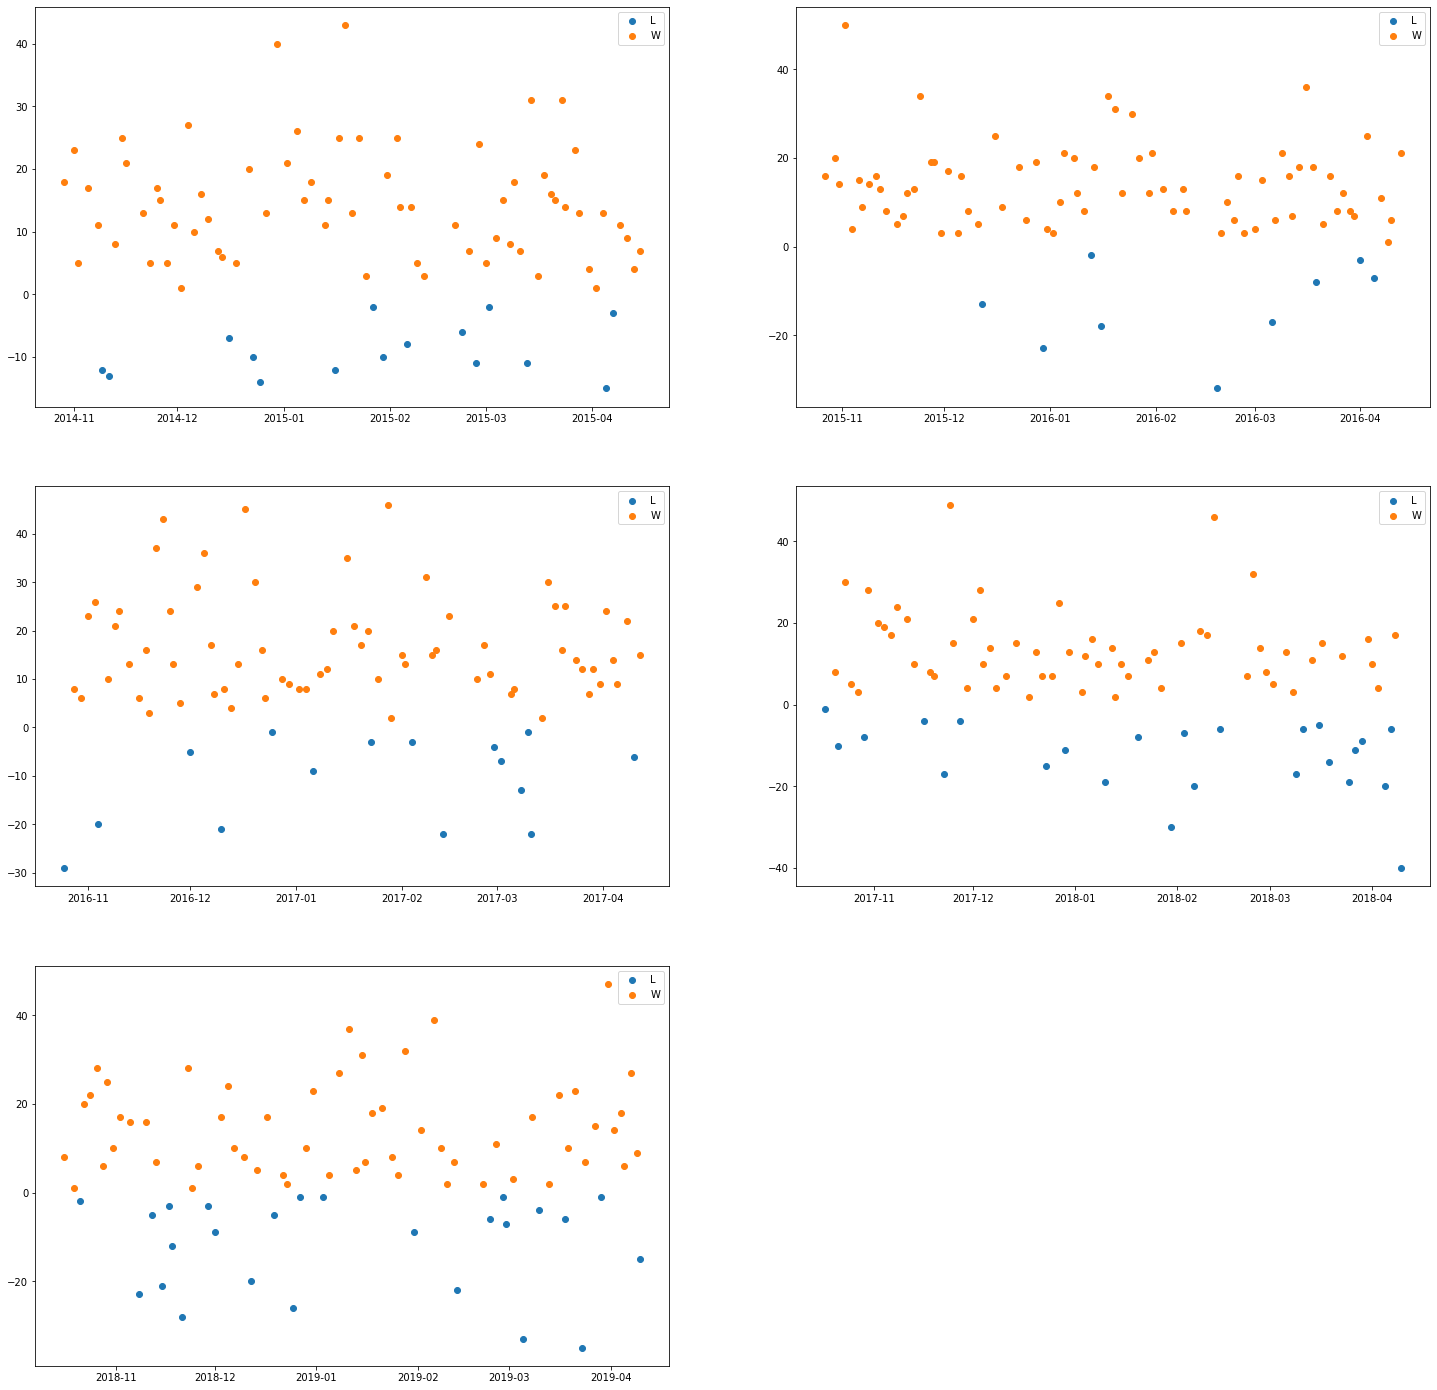

In [22]:
'''
Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')
'''
# Create a figure instance which we will dynamically add subplots to
fig = plt.figure(figsize = (25,25)) # width x height

i = 1
analysis_col = 'PLUS_MINUS'
for season in sorted(list(regular['SEASON_ID'].unique())):
    season_df = regular.loc[regular['SEASON_ID'] == season,:]
    ax = fig.add_subplot(3, 2, i)
    groups = season_df.groupby("WL")
    for name, group in groups:
        plt.scatter(group['GAME_DATE'], group[analysis_col], marker="o", label=name)
    plt.legend()
    i += 1

plt.show()

We can see that the pre KD years saw some great results in close games, specifically very few close loses (but a TON of close wins in 2016, which probably contributed to the team wearing down as the year progressed and specifically in the infamous finals matchup against the Cavaliers).

The last 3 years we start to see the close losses start to pile up; not so much in 2016-2017 but certainly in the two seasons after. Even more so since the 2016-2017 season was the best KD season in terms of overall wins (67) versus the final two seasons (58 and 57 respectively).